# polynomial Regression

In [119]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

#EDA

In [120]:
dataset = pd.read_csv('Position_Salaries (1).csv')

In [121]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [122]:
dataset.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


<Figure size 864x432 with 0 Axes>

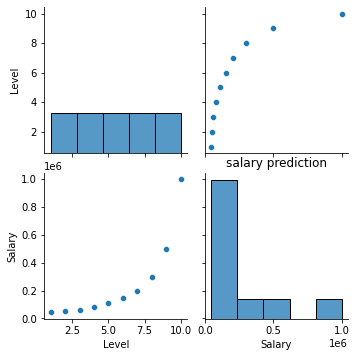

In [123]:
plt.figure(figsize=(12,6))
sns.pairplot(dataset,kind="scatter")
plt.xlabel("Level")
plt.ylabel("salary")
plt.title("salary prediction")
plt.show()

#Split Data

In [124]:
X = dataset.iloc[:, 1:2].values
y = dataset.iloc[:, 2].values
dataset

# dataset = pd.read_csv('Position_Salaries (1).csv')
# X = dataset.iloc[:, 1:2].values
# y = dataset.iloc[:, 2].values
# dataset

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [125]:
X

array([[ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10]])

In [126]:
y

array([  45000,   50000,   60000,   80000,  110000,  150000,  200000,
        300000,  500000, 1000000])

In [127]:
x_train,x_test,y_train,y_test = train_test_split(X,y)

#Build Model

In [128]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x_train, y_train) # traing 
y_pred =lin_reg.predict(x_test) # testing

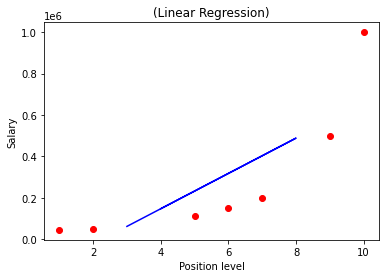

In [129]:
plt.scatter(x_train, y_train, color = 'red')
plt.plot(x_test, y_pred, color = 'blue')
plt.title('(Linear Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

#Evaluation

In [130]:
# calculate Mean square error
MSE = mean_squared_error(y_test,y_pred)

# calculate ROOT Mean square error
RMSE = np.sqrt(mean_squared_error(y_test, y_pred))

# calculate  Mean absolute error
MAE=mean_absolute_error(y_test, y_pred)

# Calculate R square vale
rsq = r2_score(y_test,y_pred)

print('mean squared error :',MSE)
print('Root mean squared error :',RMSE)
print('mean absolute error :',MAE)
print('r square :',rsq)

mean squared error : 13364036353.598106
Root mean squared error : 115602.92536782149
mean absolute error : 85971.04519774008
r square : -0.13041660885698247


# The fitting model is not good because a data in a polynomial shape and we used a simple leaner regression 

#Polynomial Regression

1- first put the data in polynomial shape(raise exponent ).

2- apply linear regression .

In [131]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)

lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
X_poly_pred = lin_reg_2.predict(X_poly)

In [132]:
X_poly

array([[1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01, 2.560e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02, 6.250e+02],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02, 6.561e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04]])

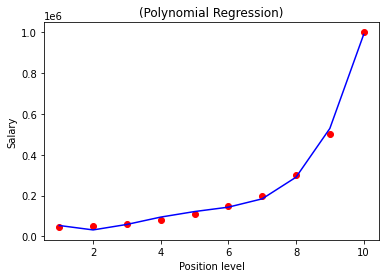

In [133]:
plt.scatter(X, y, color = 'red')
plt.plot(X, X_poly_pred, color = 'blue')
plt.title('(Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

In [134]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [135]:
X_grid = X_grid.reshape((len(X_grid), 1)) # reshape to be the same dimention
X_grid

array([[1. ],
       [1.1],
       [1.2],
       [1.3],
       [1.4],
       [1.5],
       [1.6],
       [1.7],
       [1.8],
       [1.9],
       [2. ],
       [2.1],
       [2.2],
       [2.3],
       [2.4],
       [2.5],
       [2.6],
       [2.7],
       [2.8],
       [2.9],
       [3. ],
       [3.1],
       [3.2],
       [3.3],
       [3.4],
       [3.5],
       [3.6],
       [3.7],
       [3.8],
       [3.9],
       [4. ],
       [4.1],
       [4.2],
       [4.3],
       [4.4],
       [4.5],
       [4.6],
       [4.7],
       [4.8],
       [4.9],
       [5. ],
       [5.1],
       [5.2],
       [5.3],
       [5.4],
       [5.5],
       [5.6],
       [5.7],
       [5.8],
       [5.9],
       [6. ],
       [6.1],
       [6.2],
       [6.3],
       [6.4],
       [6.5],
       [6.6],
       [6.7],
       [6.8],
       [6.9],
       [7. ],
       [7.1],
       [7.2],
       [7.3],
       [7.4],
       [7.5],
       [7.6],
       [7.7],
       [7.8],
       [7.9],
       [8. ],
      

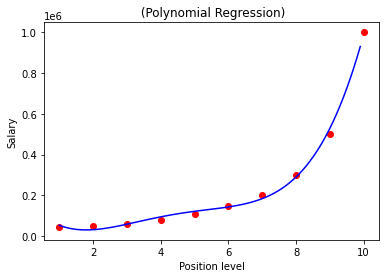

In [136]:
X_poly=poly_reg.fit_transform(X_grid)
X_poly_pred = lin_reg_2.predict(X_poly)

plt.scatter(X, y, color = 'red')
plt.plot(X_grid,X_poly_pred, color = 'blue')
plt.title(' (Polynomial Regression)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()


#Comparison between Linear Regression and Polynomial Regression

In [137]:
lin_reg.predict([[6]])

array([317944.91525424])

In [138]:
lin_reg_2.predict(poly_reg.fit_transform([[6]]))

array([143275.05827509])

In [141]:
dataset[dataset['Level']==6]

,Position,Level,Salary
5,Region Manager,6,150000
